In [2]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# cleaning the 'job_skills' into a list datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
# only get data analyst jobs in the us
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0, 0.5, 'Number of Jobs')

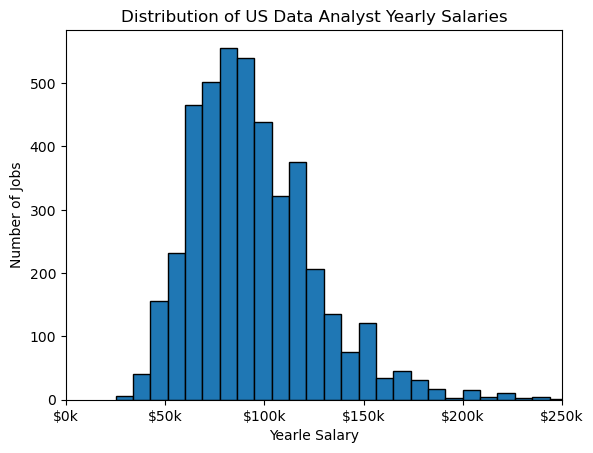

In [22]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')

plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearle Salary')
plt.ylabel('Number of Jobs')
